In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import math

In [4]:
import sklearn

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [7]:
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing

In [8]:
data=pd.read_csv('sub-division_rainfall_act_dep_1901-2015.csv')

In [9]:
print("Data heads:")
print(data.head())
print("Null values in the dataset before preprocessing:")
print(data.isnull().sum())
print("Filling null values with mean of that particular column")
data=data.fillna(np.mean(data))
print("Mean of data:")
print(np.mean(data))
print("Null values in the dataset after preprocessing:")
print(data.isnull().sum())
print("\n\nShape: ",data.shape)

Data heads:
                 SUBDIVISION       YEAR                 Parameter    JAN  \
0  ANDAMAN & NICOBAR ISLANDS  1901-2015                      Mean   49.2   
1  ANDAMAN & NICOBAR ISLANDS  1901-2015        Standard deviation   71.3   
2  ANDAMAN & NICOBAR ISLANDS  1901-2015  Coefficient of variation  144.9   
3  ANDAMAN & NICOBAR ISLANDS       1901                    Actual   49.2   
4  ANDAMAN & NICOBAR ISLANDS       1901      Percentage departure   -0.1   

     FEB    MAR   APR    MAY    JUN    JUL    AUG    SEP    OCT    NOV    DEC  \
0   27.6   30.0  72.2  355.6  471.4  397.5  400.5  431.3  289.5  233.0  153.3   
1   38.8   43.6  66.8  151.2  147.0  151.9  142.6  146.7   99.4  119.4  129.5   
2  140.4  145.5  92.5   42.5   31.2   38.2   35.6   34.0   34.3   51.2   84.5   
3   87.1   29.2   2.3  528.8  517.5  365.1  481.1  332.6  388.5  558.2   33.6   
4  215.9   -2.6 -96.8   48.7    9.8   -8.2   20.1  -22.9   34.2  139.5  -78.1   

   ANNUAL     JF    MAM    JJAS    OND  
0  

c:\Users\himan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\himan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


JAN        11.925185
FEB        13.387873
MAR        15.677721
APR        20.548187
MAY        33.842725
JUN        82.217700
JUL       121.070849
AUG       102.237275
SEP        71.355525
OCT        37.236141
NOV        18.596474
DEC        11.629088
ANNUAL    703.619800
JF         20.935956
MAM        78.359082
JJAS      531.036671
OND        76.840296
dtype: float64
Null values in the dataset after preprocessing:
SUBDIVISION    0
YEAR           0
Parameter      0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
JF             0
MAM            0
JJAS           0
OND            0
dtype: int64


Shape:  (12456, 20)


In [10]:
print("Info:")
print(data.info())

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12456 entries, 0 to 12455
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  12456 non-null  object 
 1   YEAR         12456 non-null  object 
 2   Parameter    12456 non-null  object 
 3   JAN          12456 non-null  float64
 4   FEB          12456 non-null  float64
 5   MAR          12456 non-null  float64
 6   APR          12456 non-null  float64
 7   MAY          12456 non-null  float64
 8   JUN          12456 non-null  float64
 9   JUL          12456 non-null  float64
 10  AUG          12456 non-null  float64
 11  SEP          12456 non-null  float64
 12  OCT          12456 non-null  float64
 13  NOV          12456 non-null  float64
 14  DEC          12456 non-null  float64
 15  ANNUAL       12456 non-null  float64
 16  JF           12456 non-null  float64
 17  MAM          12456 non-null  float64
 18  JJAS         12456 non-null  float64
 19

In [11]:
print("Group by:")
data.groupby('SUBDIVISION').size()

Group by:


SUBDIVISION
ANDAMAN & NICOBAR ISLANDS             333
ARUNACHAL PRADESH                     294
ASSAM & MEGHALAYA                     348
BIHAR                                 348
CHHATTISGARH                          348
COASTAL ANDHRA PRADESH                348
COASTAL KARNATAKA                     348
EAST MADHYA PRADESH                   348
EAST RAJASTHAN                        348
EAST UTTAR PRADESH                    348
GANGETIC WEST BENGAL                  348
GUJARAT REGION                        348
HARYANA DELHI & CHANDIGARH            348
HIMACHAL PRADESH                      348
JAMMU & KASHMIR                       348
JHARKHAND                             348
KERALA                                348
KONKAN & GOA                          348
LAKSHADWEEP                           345
MADHYA MAHARASHTRA                    348
MATATHWADA                            348
NAGA MANI MIZO TRIPURA                348
NORTH INTERIOR KARNATAKA              348
ORISSA                

In [12]:
print("Co-Variance =",data.cov())
print("Co-Relation =",data.corr())

Co-Variance =                 JAN          FEB           MAR           APR           MAY  \
JAN     8011.565394   252.797989    492.682491    413.073262    485.076820   
FEB      252.797989  9727.811468   1635.033482    607.699419    761.106427   
MAR      492.682491  1635.033482  11890.392323   1229.579927    942.748632   
APR      413.073262   607.699419   1229.579927   9714.839056   2878.444481   
MAY      485.076820   761.106427    942.748632   2878.444481  10447.462285   
JUN      402.799365   835.856987   1435.094772   4174.491573   9560.595356   
JUL      678.676044  1039.244504   1756.504540   4297.823146   9568.013779   
AUG      764.796401  1011.637181   1485.117693   3379.224404   7538.195042   
SEP      504.358044   765.791719   1140.864628   2768.122641   6086.316994   
OCT      275.362691   402.883567    302.064541   1721.602283   4482.027654   
NOV      360.819313     3.325311     75.013226    308.519739   1722.352374   
DEC       31.505487    56.367957   1489.541745    

In [13]:
corr_cols=data.corr()['ANNUAL'].sort_values()[::-1]
print("Index of correlation columns:",corr_cols.index)

Index of correlation columns: Index(['ANNUAL', 'JJAS', 'JUN', 'JUL', 'AUG', 'SEP', 'MAM', 'OND', 'MAY',
       'OCT', 'APR', 'JF', 'NOV', 'MAR', 'DEC', 'FEB', 'JAN'],
      dtype='object')


Scatter plot of annual and january attributes


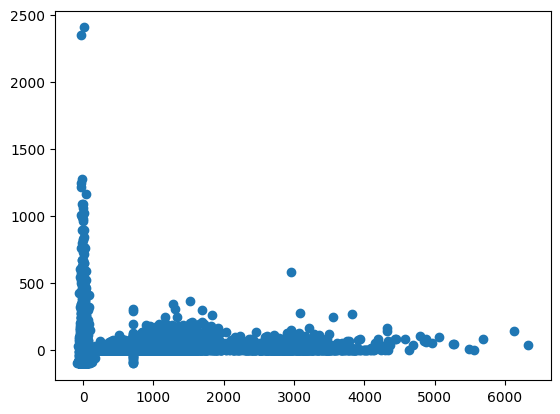

In [14]:
print("Scatter plot of annual and january attributes")
plt.scatter(data.ANNUAL,data.JAN)

Box Plot of annual rainfall data in years 1901-2015


<AxesSubplot: >

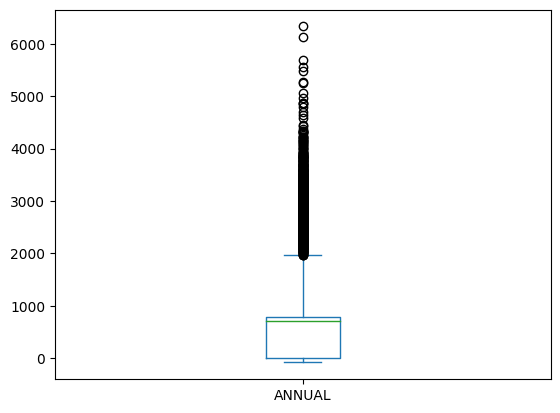

In [15]:
print("Box Plot of annual rainfall data in years 1901-2015")
data['ANNUAL'].plot(kind='box',sharex=False,sharey=False)

Histograms showing the data from attributes (JANUARY to DECEMBER) of the years 1901-2015:


<AxesSubplot: >

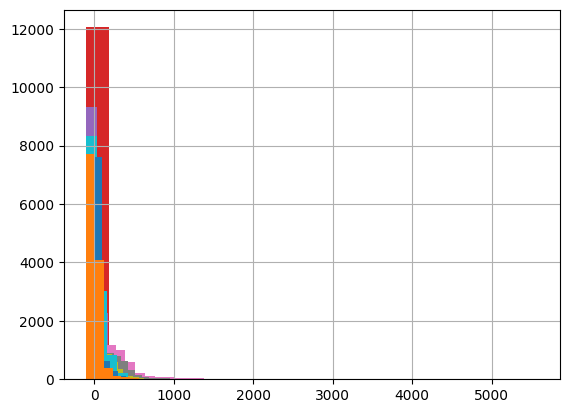

In [16]:
print("Histograms showing the data from attributes (JANUARY to DECEMBER) of the years 1901-2015:")
data['JAN'].hist(bins=20)
data['FEB'].hist(bins=20)
data['MAR'].hist(bins=20)
data['APR'].hist(bins=20)
data['MAY'].hist(bins=20)
data['JUN'].hist(bins=20)
data['JUL'].hist(bins=20)
data['AUG'].hist(bins=20)
data['SEP'].hist(bins=20)
data['OCT'].hist(bins=20)
data['NOV'].hist(bins=20)
data['DEC'].hist(bins=20)

Histogram showing the annual rainfall of the all states:


<AxesSubplot: >

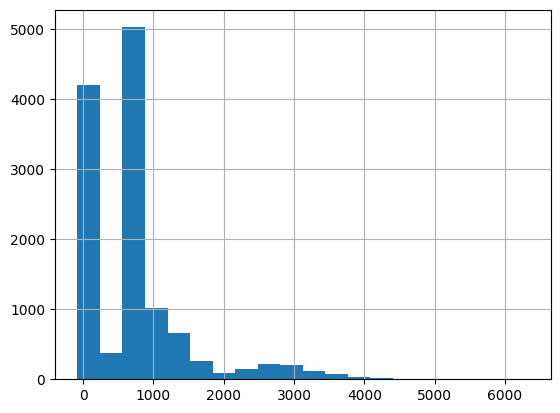

In [17]:
print("Histogram showing the annual rainfall of the all states:")
data['ANNUAL'].hist(bins=20)

Violin plot of the ANNUAL attribute :-


<AxesSubplot: >

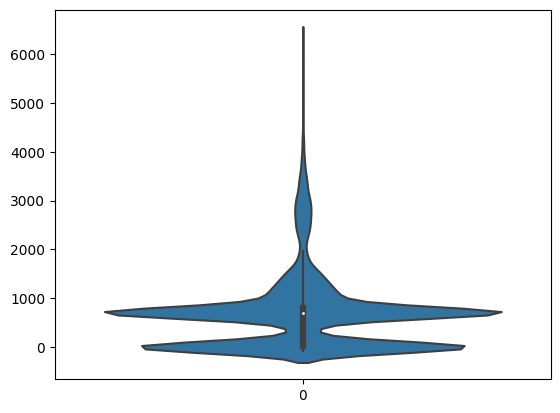

In [18]:
print("Violin plot of the ANNUAL attribute :-")
sb.violinplot(data=data['ANNUAL'])